In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Load the employee data from CSV
df = pd.read_csv('employee_data.csv')

In [4]:
# Explore the dataset
print(df.head())  # Display the first few rows of the dataframe

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

# Evaluate each factor's relationship with attrition

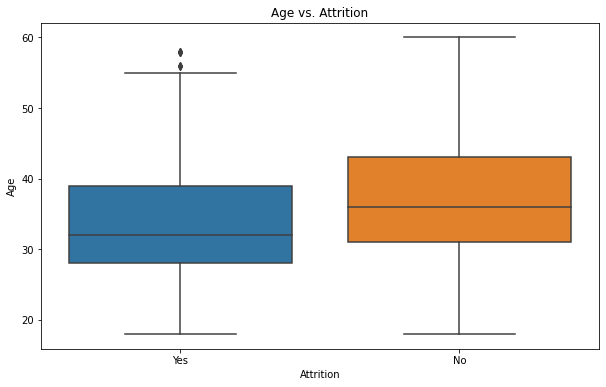

In [5]:
# Age vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age vs. Attrition')
plt.show()

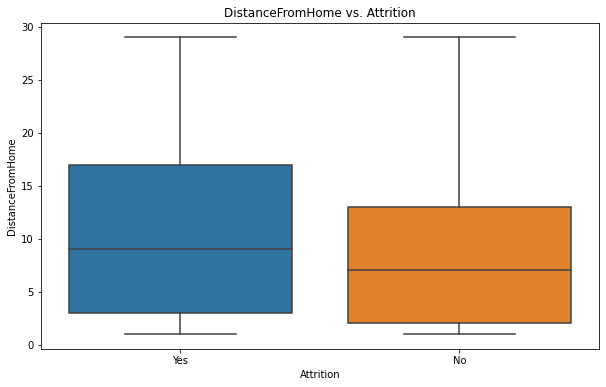

In [6]:
# DistanceFromHome vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title('DistanceFromHome vs. Attrition')
plt.show()

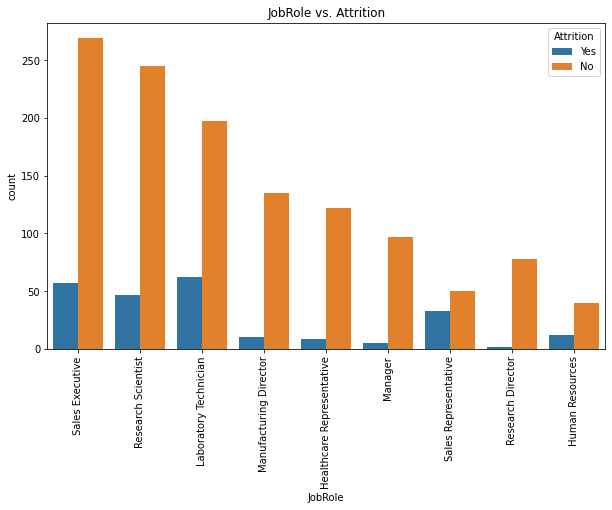

In [7]:
# JobRole vs. Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('JobRole vs. Attrition')
plt.xticks(rotation=90)
plt.show()

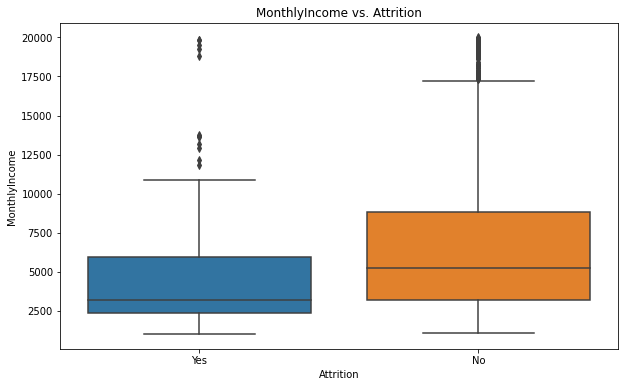

In [8]:
# MonthlyIncome vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('MonthlyIncome vs. Attrition')
plt.show()

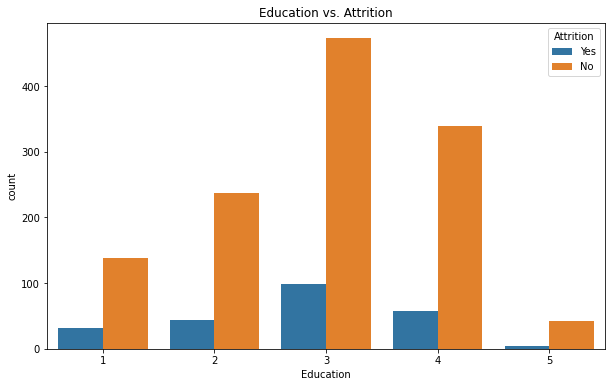

In [9]:
# Education vs. Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Attrition', data=df)
plt.title('Education vs. Attrition')
plt.show()

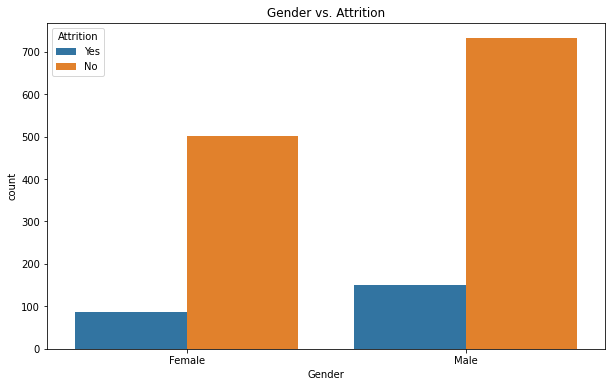

In [10]:
# Gender vs. Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Gender vs. Attrition')
plt.show()

In [11]:
# Preprocessing
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)  # Remove unnecessary columns
df = df.dropna()  # Remove rows with missing values

In [12]:
# Encode categorical features
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

In [13]:
# Split the data into train and test sets
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('\nAccuracy:', accuracy)
print('\nConfusion Matrix:')
print(confusion_mat)


Accuracy: 0.8809523809523809

Confusion Matrix:
[[254   1]
 [ 34   5]]


In [17]:
# Provide conclusions and recommendations
if accuracy > 0.8:
    conclusion = "The model performs well in predicting employee attrition."
else:
    conclusion = "The model's performance in predicting employee attrition can be further improved."

print('\nConclusion:', conclusion)


Conclusion: The model performs well in predicting employee attrition.
